# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [4]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [5]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
df.shape

(1898, 9)

#### Observations: There are 1,898 rows and 9 columns in the dataset

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:  4 columns are integer types, 4 columns are strings types, 1 column is float type


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# NA

#### Observations:
No there are no missing values according to the df.shape() and df.info() functions

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
df['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations:
Min = 20.00
Max = 35.00
Mean = 27.37

### **Question 5:** How many orders are not rated? [1 mark]

In [37]:
# See unique values for 'rating' column by converting values into a set
rating_set = set(df['rating'])
print(rating_set)

# Count the number of records that are missing a rating
missing_ratings = df[df['rating'] == 'Not given'].shape
missing_ratings

{'4', '5', 'Not given', '3'}


(736, 9)

#### Observations:
There are 736 records in the dataset where the orders are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

## Cost of the Order

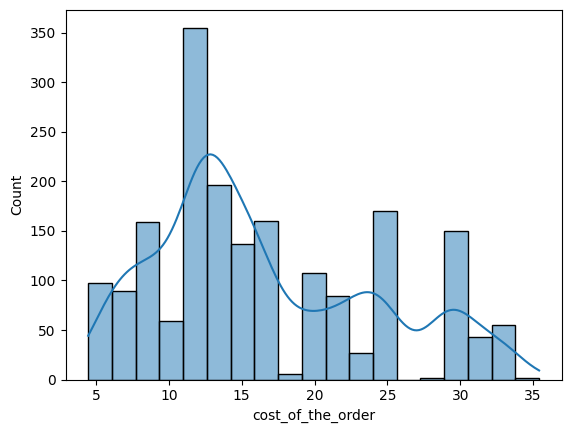

In [12]:
sns.histplot(data = df, x = 'cost_of_the_order', kde=True);

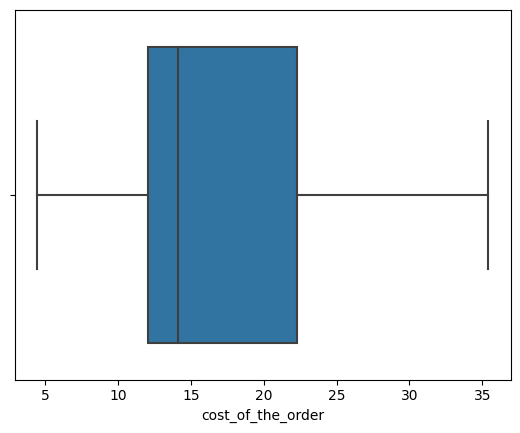

In [16]:
sns.boxplot(data=df, x = 'cost_of_the_order');

In [96]:
df['cost_of_the_order'].describe()

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

#### Observation: The average cost of an order was about $16.50... The median was about $14.15 resulting in a slightly right-skewed distribution

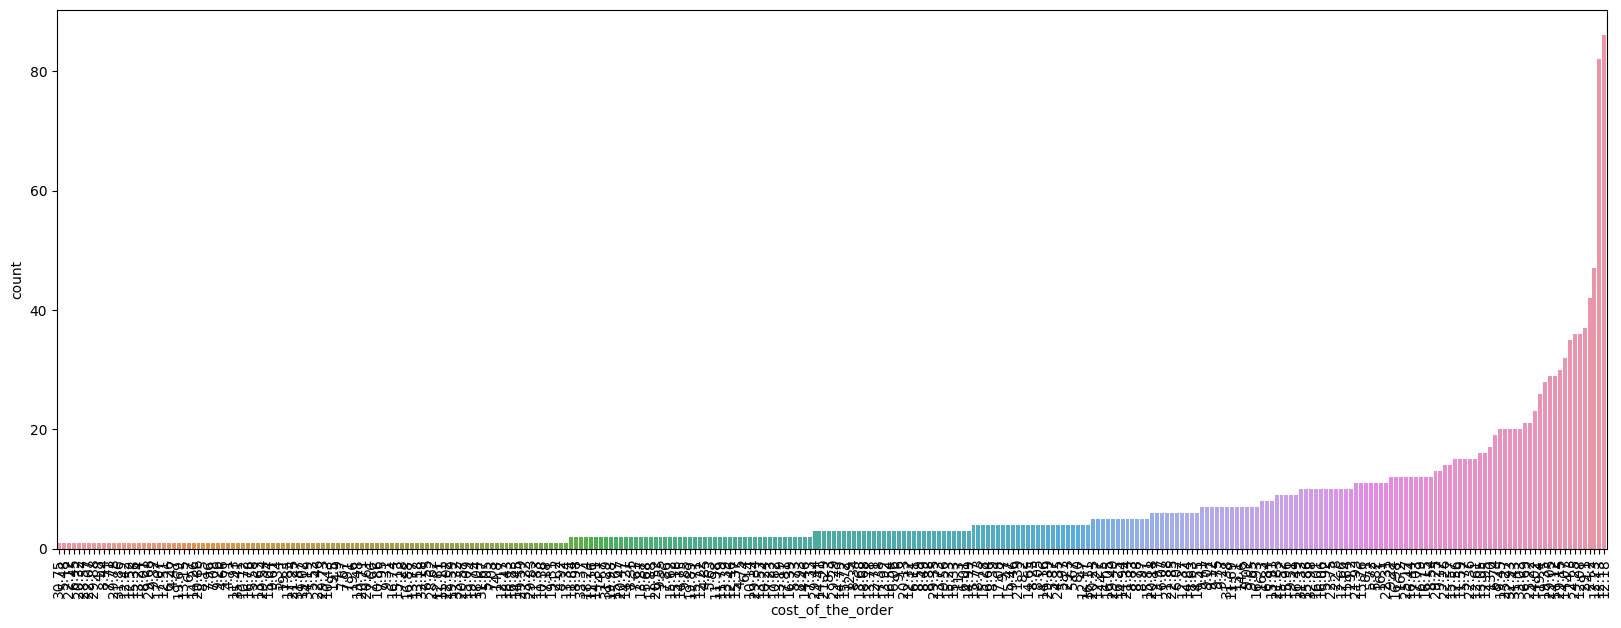

In [118]:
plt.figure(figsize=(20,7))
sns.countplot(data=df,x='cost_of_the_order', order = df['cost_of_the_order'].value_counts(ascending=True).index)
plt.xticks(rotation=90);

In [183]:
print(f'However, interestingly two customers spent almost 80$ for their orders')

However, interestingly two customers spent almost 80$ for their orders


# Day of the week

In [132]:
days_of_week = df["day_of_the_week"].unique()
print(days_of_week)
df.groupby(['day_of_the_week'])['order_id'].count()

['Weekend' 'Weekday']


day_of_the_week
Weekday     547
Weekend    1351
Name: order_id, dtype: int64

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

## Restaurants

In [135]:
restaurant_count = df.groupby(['restaurant_name']).count()
restaurant_count.shape

(178, 8)

In [137]:
# Restuarant Rank
restaurant_rank = restaurant_count.sort_values(by = 'order_id', ascending = False)
restaurant_rank['order_id'].head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64

#### Observation: Out of the 178 restaurants featured in this dataset. Shake Shack was the most popular place to order delivery during this time period.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [163]:
cuisine_by_days_of_week = df.groupby(['day_of_the_week'])['cuisine_type'].value_counts()
cuisine_by_days_of_week

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean         

#### Observations:
American food is the most popular food on both weekdays and weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [171]:
orders_more_than_twenty= df[df['cost_of_the_order'] > 20].count()
count_of_orders = df.count()
percentage_of_orders_more_than_twenty = orders_more_than_twenty/count_of_orders*100
print(percentage_of_orders_more_than_twenty[0])

29.24130663856691


#### Observations:


In [181]:
print(f'About {percentage_of_orders_more_than_twenty[0]:.1f}% of orders cost more than 20$')

About 29.2% of orders cost more than 20$


### **Question 10**: What is the mean order delivery time? [1 mark]

In [179]:
order_delivery_time = df['delivery_time'].describe()
order_delivery_time

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

#### Observations:


In [180]:
print(f'The average delivery time is {order_delivery_time[1]:.1f} minutes')

The average delivery time is 24.2 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

## Customer ID

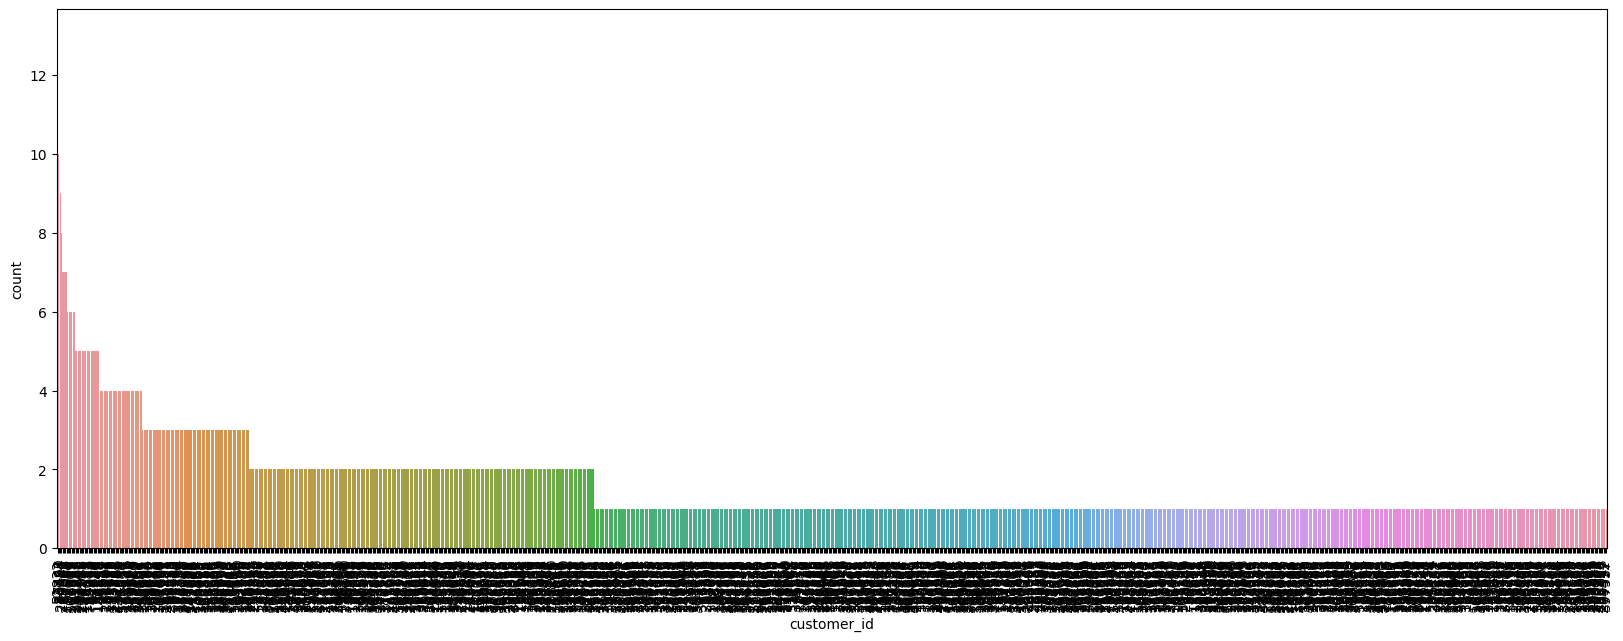

In [115]:
plt.figure(figsize=(20,7))
sns.countplot(data=df, x = 'customer_id', order=df['customer_id'].value_counts(ascending=False).index)
plt.xticks(rotation=90);

In [182]:
customer_id_count = df.groupby(['customer_id']).count()
print(customer_id_count.shape)
customer_id_value_counts = df['customer_id'].value_counts()
print(customer_id_value_counts[0:3])

(1200, 8)
52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


In [110]:
customer_id_value_counts.describe()

count    1200.000000
mean        1.581667
std         1.090560
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        13.000000
Name: customer_id, dtype: float64

#### Observation: The graph is not that helpful but the majority of customers only ordered one delivery.

#### Observations:


In [198]:
print(f'Customers 52832, 47440, & 83287 will receive the 20% discount for ordering {customer_id_value_counts.iloc[0]}, {customer_id_value_counts.iloc[1]}, and {customer_id_value_counts.iloc[2]} orders, respectively')

Customers 52832, 47440, & 83287 will receive the 20% discount for ordering 13, 10, and 9 orders, respectively


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [ ]:
# Write the code here

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---